In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
#Import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ecommerce_retail = '/content/drive/MyDrive/Final_project_RFM/ecommerce retail.xlsx'
df = pd.read_excel(ecommerce_retail)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Investigate missing value
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#drop missing value
df = df.dropna()
df.shape

(406829, 8)

In [ ]:
#Check the data type
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#Correcting data type
df['InvoiceNo'] = df['InvoiceNo'].astype('string')
df['StockCode'] = df['StockCode'].astype('string')
df['CustomerID'] = df['CustomerID'].astype('string')
df['StockCode'] = df['StockCode'].str.replace(r'\D', '', regex=True)
df.dtypes


InvoiceNo      string[python]
StockCode      string[python]
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID     string[python]
Country                object
dtype: object

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,406829.000000,406829,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-31 11:48:00,1.950000
75%,12.000000,2011-10-20 13:06:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,248.693370,NaN,69.315162


In [ ]:
#remove canceled orders
df = df[df['Quantity']>0 & (df['UnitPrice'] > 0)]
df.shape

(397924, 8)

In [ ]:
# check and clean duplicate data
df.duplicated().sum()

5226

In [ ]:
df = df.drop_duplicates()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Create new column "Sales"
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
temp=['InvoiceNo' ,'CustomerID', 'InvoiceDate', 'Sales']
RFM_data=df[temp]
RFM_data.shape

(392698, 4)

In [ ]:
# Reference point for calculating recency values 2011-12-31 -> creates a datetime object called today that represents 2011-12-31
NOW = dt.datetime(2011,12,31)
#Convert ORDERDATE to datetime format.
RFM_data['InvoiceDate'] = pd.to_datetime(RFM_data['InvoiceDate'])
# RFM Table
RFM_table=RFM_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days,
                                                'InvoiceNo': 'nunique',
                                                'Sales': 'sum'}).reset_index()
RFM_table['InvoiceDate'] = RFM_table['InvoiceDate'].astype(int)
RFM_table.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Sales': 'Monetary'}, inplace=True)
RFM_table.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,346,1,77183.60
1,12347.0,23,7,4310.00
2,12348.0,96,4,1797.24
3,12349.0,39,1,1757.55
4,12350.0,331,1,334.40


In [ ]:
# Assign range for RFM then calculate R score, F score, and M score using quintiles method. R_variable range from 5 to 1 (in descending order) and R_variable will contain the integers 5, 4, 3, 2, and 1
# Note: set q parameter = 5 since we want to divide data into 5 quantiles
# Using qcut() function to calculate the recency score, frequency score, monetary score for each row.

R_variable = range(5, 0, -1)
F_variable = range(1, 6)
M_variable = range(1, 6)

RFM_table['R_scores'] = pd.qcut(RFM_table['Recency'], q = 5, labels = R_variable)
RFM_table['F_ranks'] = RFM_table['Frequency'].rank(method='first')
RFM_table['F_scores'] = pd.qcut(RFM_table['F_ranks'], q=5, labels=F_variable)
RFM_table['M_scores'] = pd.qcut(RFM_table['Monetary'], q = 5, labels = M_variable)

In [ ]:
# Combines the three individual RFM scores (recency, frequency, and monetary) into a single integer score
RFM_table['RFM_Score'] = RFM_table['R_scores'].astype(str) + RFM_table['F_scores'].astype(str) + RFM_table['M_scores'].astype(str)
RFM_table['RFM_Score'] = RFM_table['RFM_Score'].astype(int)
RFM_table.head()

,CustomerID,Recency,Frequency,Monetary,R_scores,F_ranks,F_scores,M_scores,RFM_Score
0,12346.0,346,1,77183.60,1,1.0,1,5,115
1,12347.0,23,7,4310.00,5,3640.0,5,5,555
2,12348.0,96,4,1797.24,2,2838.0,4,4,244
3,12349.0,39,1,1757.55,4,2.0,1,4,414
4,12350.0,331,1,334.40,1,3.0,1,2,112


In [ ]:
# Load dataframe of customer segmentation

segment = pd.read_excel('/content/drive/MyDrive/Final_project_RFM/ecommerce retail.xlsx', sheet_name='Segmentation')
segment.columns = [col.replace(' ', '_') for col in segment.columns]
segment

,Segment,RFM_Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
# Convert rfm_score to list
## Splits the rfm_score column by commas, creating a nested list of strings in each row
segment['RFM_Score'] = segment['RFM_Score'].str.split(',')

## Explodes the rfm_score column, creating a new row for each element in the nested list. The resulting DataFrame has more rows and each row corresponds to a unique RFM score for a given customer segment
segment = segment.explode('RFM_Score').reset_index(drop=True)

## Use astype(int) convert rfm_score column from strings to integers
segment['RFM_Score'] = segment['RFM_Score'].astype(int)

# Sorting. Puts the segments in order from "best" to "worst" based on their average RFM score.
segment.sort_values(by='RFM_Score')
segment.head(10)

,Segment,RFM_Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
5,Champions,455
6,Champions,445
7,Loyal,543
8,Loyal,444
9,Loyal,435


In [ ]:
# Merge the RFM and segment DataFrames based on their RFM_Score column
Merge_RFM_segment = RFM_table.merge(segment, how='left', on='RFM_Score')
Merge_RFM_segment

,CustomerID,Recency,Frequency,Monetary,R_scores,F_ranks,F_scores,M_scores,RFM_Score,Segment
0,12346.0,346,1,77183.60,1,1.0,1,5,115,Cannot Lose Them
1,12347.0,23,7,4310.00,5,3640.0,5,5,555,Champions
2,12348.0,96,4,1797.24,2,2838.0,4,4,244,At Risk
3,12349.0,39,1,1757.55,4,2.0,1,4,414,Promising
4,12350.0,331,1,334.40,1,3.0,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,298,1,180.60,1,1493.0,2,1,121,Lost customers
4335,18281.0,201,1,80.82,1,1494.0,2,1,121,Lost customers
4336,18282.0,28,2,178.05,5,2329.0,3,1,531,Potential Loyalist
4337,18283.0,24,16,2045.53,5,4188.0,5,4,554,Champions


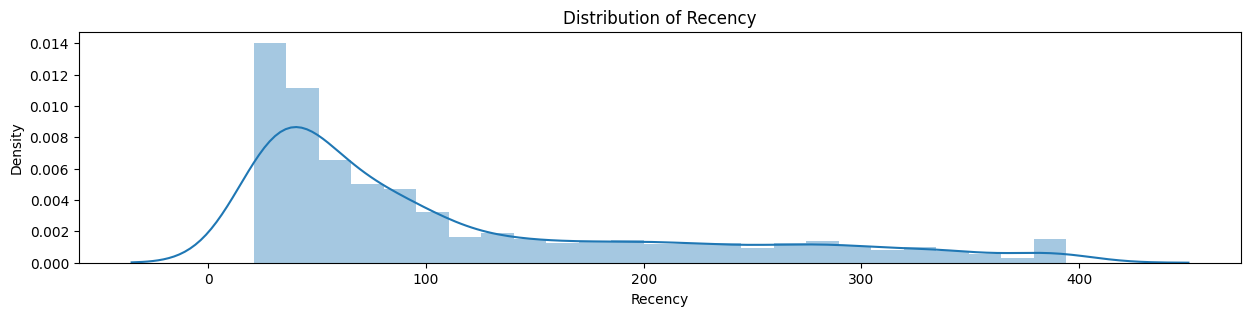

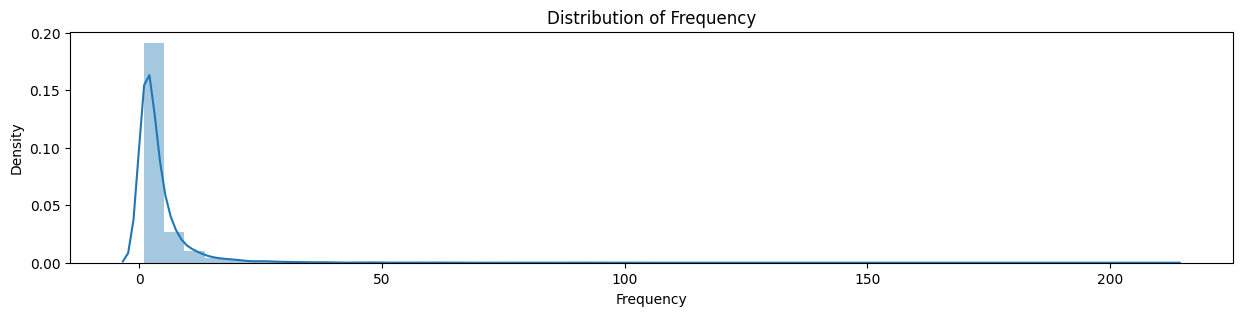

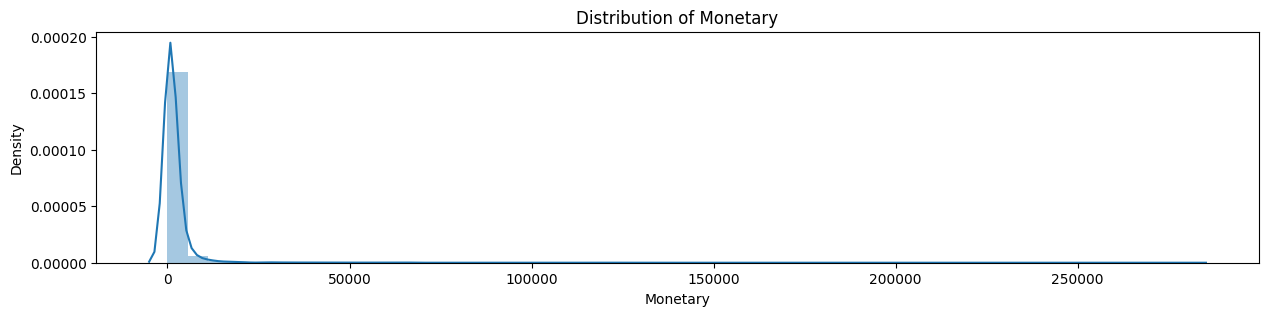

In [ ]:
# Histogram distribution of each variable

column_names = ['Recency', 'Frequency', 'Monetary']

for col in column_names:
    fig, ax = plt.subplots(figsize=(15,3))
    sns.distplot(Merge_RFM_segment[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

In [ ]:
# Prepare data for treemap
group = Merge_RFM_segment.groupby('Segment').agg({'CustomerID': 'count', 'Monetary': 'sum','Recency': 'mean'}).reset_index()
group.columns = ['Segment', 'customer_count', 'total_monetary', 'mean_recency']
group.sort_values(by='customer_count', ascending=False, inplace=True)
group

,Segment,customer_count,total_monetary,mean_recency
3,Champions,834,5591564.760,31.841727
4,Hibernating customers,693,282730.532,170.591631
5,Lost customers,484,96339.480,296.016529
6,Loyal,427,1016367.750,57.025761
1,At Risk,424,750853.831,164.445755
9,Potential Loyalist,411,221398.990,47.282238
0,About To Sleep,286,78743.090,106.954545
7,Need Attention,286,466252.831,53.979021
8,New Customers,269,59674.930,48.776952
10,Promising,133,119099.520,45.654135


In [ ]:
group['count_share'] = group['customer_count'] / group['customer_count'].sum()
group['monetary_share'] = group['total_monetary'] / group['total_monetary'].sum()
group

,Segment,customer_count,total_monetary,mean_recency,count_share,monetary_share
3,Champions,834,5591564.760,31.841727,0.192210,0.629182
4,Hibernating customers,693,282730.532,170.591631,0.159714,0.031814
5,Lost customers,484,96339.480,296.016529,0.111546,0.010840
6,Loyal,427,1016367.750,57.025761,0.098410,0.114365
1,At Risk,424,750853.831,164.445755,0.097718,0.084489
9,Potential Loyalist,411,221398.990,47.282238,0.094722,0.024913
0,About To Sleep,286,78743.090,106.954545,0.065914,0.008860
7,Need Attention,286,466252.831,53.979021,0.065914,0.052464
8,New Customers,269,59674.930,48.776952,0.061996,0.006715
10,Promising,133,119099.520,45.654135,0.030652,0.013401


In [ ]:
pip install squarify

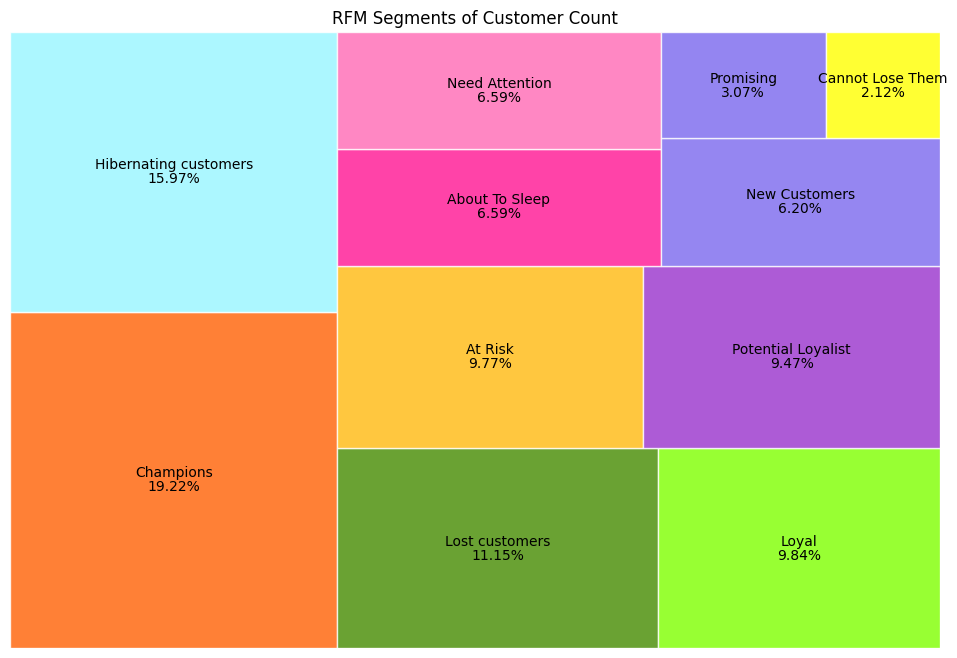

In [ ]:
# Treemap.
import squarify
colors = ['#FF6103','#98F5FF','#458B00','#7FFF00','#FFB90F','#9932CC','#FF1493','#FF69B4','#7B68EE','#7A67EE','#FFFF00']

fig, ax = plt.subplots(1, figsize = (12,8))

squarify.plot(sizes = group['customer_count'],
              label = group['Segment'],
              value = [f'{x*100:.2f}%' for x in group['count_share']],
              alpha = .8,
              color = colors,
              bar_kwargs = dict(linewidth=1, edgecolor="white"))
plt.title('RFM Segments of Customer Count', fontsize=12)
plt.axis('off')
plt.show()

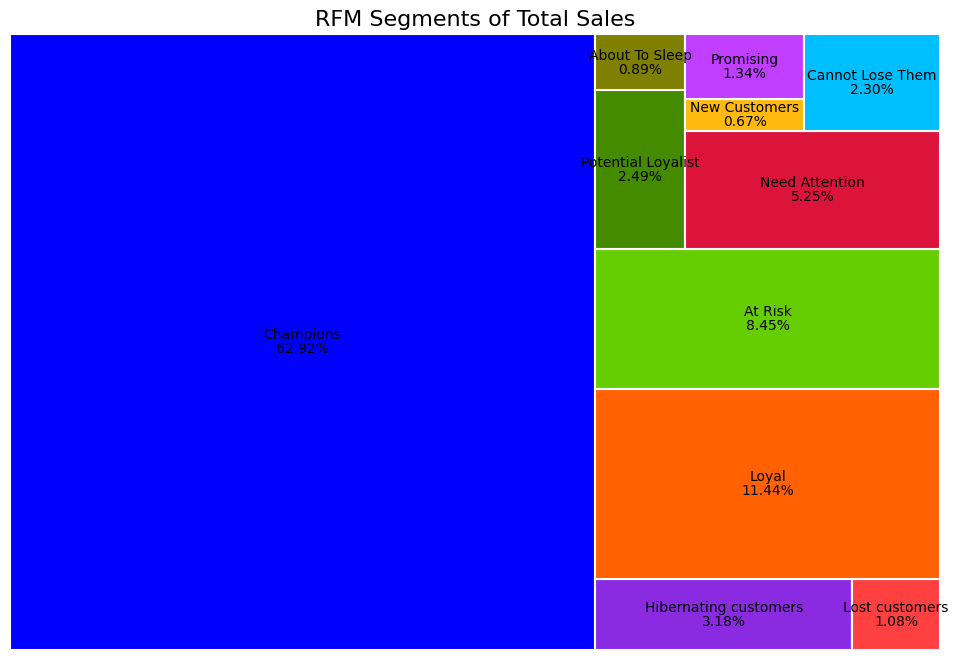

In [ ]:
colors = ['#0000FF','#8A2BE2','#FF4040','#FF6103','#66CD00','#458B00','#808000','#DC143C','#FFB90F','#BF3EFF','#00BFFF']

fig, ax = plt.subplots(1, figsize = (12,8))

squarify.plot(sizes = group['monetary_share'],
              label = group['Segment'],
              value = [f'{x*100:.2f}%' for x in group['monetary_share']],
              alpha = 1,
              color = colors,
              bar_kwargs = dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Total Sales', fontsize=16)
plt.axis('off')
plt.show()

INSIGHT


1. Tập Trung vào Khách Hàng Champions:
Insight: Nhóm Champions chiếm tỷ lệ cao nhất trong số các nhóm (19,22%) và đóng góp lớn nhất vào doanh số (62,92%).
Khuyến nghị: Tiếp tục duy trì và phát triển mối quan hệ với nhóm này thông qua các chương trình ưu đãi đặc biệt, chăm sóc khách hàng chất lượng cao, và phát triển sản phẩm mới phù hợp với nhu cầu của họ.

2. Chú Trọng Nhóm Khách Hàng At Risk:
Insight: Nhóm At Risk chiếm 9% khách hàng nhưng đóng góp 8% doanh thu, cao hơn nhóm Lost Customers. Họ có recency cao, cho thấy tiềm năng lớn.
Khuyến nghị: Tạo chiến dịch tái kích hoạt tập trung vào nhóm này, cung cấp ưu đãi đặc biệt và trải nghiệm cá nhân hóa để ngăn chặn việc họ trở thành Lost Customers.

3. Giảm Tỷ Lệ Khách Hàng Hibernating:
Insight: Nhóm Hibernating là một trong hai nhóm chiếm tỷ trọng nhiều nhất, chỉ sau nhóm Champion.
Khuyến nghị: Phân tích nguyên nhân khách hàng ngừng hoạt động và triển khai các chiến lược tái kích hoạt phù hợp, như gửi thông báo sản phẩm mới hoặc ưu đãi đặc biệt.

4. Tái Kích Hoạt Khách Hàng Lost Customers:
Insight: Nhóm Lost Customers chiếm tỷ trọng cao thứ ba, cho thấy cần có chiến lược thu hút lại.
Khuyến nghị: Tạo chiến dịch win-back với các ưu đãi hấp dẫn và thông điệp cá nhân hóa để khôi phục mối quan hệ với những khách hàng này.

5. Phân Tích Tương Quan giữa Các Nhóm:
Insight: Nhóm Hibernating, Champion và Lost Customers có 3 chỉ số khác biệt hoàn toàn, cho thấy sự phân chia rõ ràng và mối tương quan giữa các chỉ số.
Khuyến nghị: Sử dụng phân tích này để tối ưu hóa chiến lược tiếp cận cho từng nhóm, tập trung vào việc chuyển đổi khách hàng từ nhóm kém hiệu quả sang nhóm có giá trị cao hơn.

6. Theo Dõi Biến Động Tỷ Trọng Các Nhóm:
Insight: Tỷ trọng của các nhóm có thể thay đổi theo thời gian và phản ánh tình trạng của doanh nghiệp (ví dụ: tỷ lệ cao của nhóm "Can Not Lose Them" có thể chỉ ra xu hướng giảm sút).
Khuyến nghị: Theo dõi sát sao sự thay đổi trong tỷ trọng các nhóm khách hàng để nhanh chóng điều chỉnh chiến lược và nhận diện các xu hướng tiềm ẩn trong kinh doanh.
